In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hvplot.pandas


## Rhea coding for graphs

In [ ]:
path = Path("Resources/cleaned_post_code_registration.csv")
read0 = pd.read_csv(path)

In [ ]:
#Total registrations for each fuel type
types= read0.groupby("Fuel Type").sum()
types= types.drop(['Postcode','State'],axis=1)
types

In [ ]:
#EV & Hybrid registration trends combined

BEV_data= read0.loc[(read0["Fuel Type"]=="Battery Electric Vehicle")|(read0["Fuel Type"]=="Hybrid"),:]

first_count= BEV_data["Registrations as at 31 January 2021"].sum()
second_count= BEV_data["Registrations as at 31 January 2022"].sum()
third_count= BEV_data["Registrations as at 31 January 2023"].sum()

Total_reg= pd.DataFrame({"2021":[first_count],"2022":second_count,"2023":third_count}).T
Total_reg.plot(marker="o", title= "EV ownership trend 2021-23", grid=True, legend=False)
plt.xlabel("Years")
plt.xticks(rotation= 0)
plt.ylabel("No. of Registrations")
plt.savefig("Output/BEV_ownership.png")
plt.show()

In [ ]:
#Comparison of ICE & EV by percentage

firstyear_total= types["Registrations as at 31 January 2021"].sum()
secondyear_total= types["Registrations as at 31 January 2022"].sum()
thirdyear_total= types["Registrations as at 31 January 2023"].sum()

types["2021"]=types["Registrations as at 31 January 2021"]/firstyear_total*100
types["2022"]=types["Registrations as at 31 January 2022"]/secondyear_total*100
types["2023"]=types["Registrations as at 31 January 2023"]/thirdyear_total*100

types_new= types.drop(['Registrations as at 31 January 2021','Registrations as at 31 January 2022',
                       'Registrations as at 31 January 2023'],axis=1)

types_new= types_new[["2021","2022","2023"]].T
types_new["Hybrid & BEV"]= types_new["Hybrid"]+types_new["Battery Electric Vehicle"]

comparison_df= types_new[["Internal Combustion Engine","Hybrid & BEV"]]
comparison_df.plot(marker="o", title= "EV & ICE ownership trend 2021-23", grid=True, legend=False)
plt.xlabel("Years")
plt.xticks(rotation= 0)
plt.ylabel("No. of Registrations")
plt.savefig("Output/Ownership trends comparison")

plt.show()
comparison_df

In [ ]:
#EV & combustion engine comparison for 2023
years_df= comparison_df[["Internal Combustion Engine","Hybrid & BEV"]].T
types_2023 = years_df["2023"]
plt.title("EV & Combustion engine ownership 2023")
labels= ["Combustion", "EV"]
plt.pie(types_2023, explode=(0,0.4), labels=labels, colors=("lightskyblue","green"), autopct="%1.1f%%",
          startangle=360)
plt.axis("equal")
plt.tight_layout()
plt.savefig("Output/Ownership comparison 2023")

plt.show()

In [ ]:
#EV & combustion engine comparison for 2021
types_2023 = years_df["2021"]
plt.title("EV & Combustion engine ownership 2021")
labels= ["Combustion ", "EV"]
plt.pie(types_2023, explode=(0,0.4), labels=labels, colors=("lightskyblue","green"), autopct="%1.1f%%",
          startangle=360)
plt.axis("equal")
plt.savefig("Output/Ownership comparison 2021")

plt.show()

In [ ]:
#State BEV registrations comparison 

State_BEV= BEV_data.groupby("State").sum()
State_totals= State_BEV[["Registrations as at 31 January 2021","Registrations as at 31 January 2022",
                         "Registrations as at 31 January 2023"]]
renamed= State_totals.rename(columns={"Registrations as at 31 January 2021":"2021",
                           "Registrations as at 31 January 2022":"2022",
                           "Registrations as at 31 January 2023":"2023"})

renamed.plot(kind= "bar", title="BEV registrations by States 2021-23")
plt.xlabel("States")
plt.xticks(rotation= 45)
plt.ylabel("No. of BEV Registrations")
plt.tight_layout()
plt.savefig("Output/States_comparison.png")
plt.show()

renamed

In [ ]:
#plotting postcodes with high EV ownership
postcode= pd.read_csv("Resources/australian_postcodes.csv")
postcodes_df= postcode.rename(columns={"postcode":"Postcode"})
postcodes_df["Postcode"]= postcodes_df["Postcode"].drop_duplicates()

merged= pd.merge(BEV_data,postcodes_df, on="Postcode", how="inner")

merged_short= merged[["Postcode","Lat_precise","Long_precise","Registrations as at 31 January 2023"]]
BEV_postcodes = merged_short.sort_values(by="Registrations as at 31 January 2023", ascending=False)
top_postcodes= BEV_postcodes.loc[BEV_postcodes["Registrations as at 31 January 2023"]>1000]

BEV_plot = top_postcodes.hvplot.points("Long_precise","Lat_precise",
    geo = True, color="Postcode", size= "Registrations as at 31 January 2023",
    tiles = "OSM", frame_width = 700, frame_height = 500, scale= 0.5, colorbar=False)

BEV_plot
#saved as EV ownersip locations using screen capture as could not get hvlpot save to run

## Mich plot of age breakdown per suburbs for each vehicle type

Battery Electric Vehicles

In [ ]:
# read in the file
plot_file_path = 'Resources/BEV_top10_total.csv'
plot_df = pd.read_csv(plot_file_path)
#filter out the total rows, first remove any leading or trailling spaces
plot_df['Age'] = plot_df['Age'].str.strip()
f_plot_df = plot_df[plot_df['Age'] != 'Total']
#get the postcodes to plot from the datafile
pc_to_plot = f_plot_df['Postcode'].unique()

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Set the width of each bar
bar_width = 0.4

# Plot all postcodes on one graph using a grouped bar plot
for i, postcode in enumerate(pc_to_plot):
    subset_by_postcode = f_plot_df[f_plot_df['Postcode'] == postcode]
    
    # Calculate the x-coordinates for each bar
    x_positions = [j + i * (bar_width) for j in range(len(subset_by_postcode))]
        
    # Plot the bars
    ax.bar(x_positions,
           subset_by_postcode['Population'],
           width=bar_width,
           label=f'Postcode {postcode}', 
           alpha=0.7
          )

# Set x-axis ticks and labels
ax.set_xticks([i + bar_width * (len(pc_to_plot) - 1) / 2 for i in range(len(subset_by_postcode))])
ax.set_xticklabels(subset_by_postcode['Age'])

plt.title('Population Breakdown by Age Groups - Top 10 BEV Postcodes')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend()
plt.tight_layout()
plt.savefig(f'Output/Population_Breakdown_Postcode_BEV.png')
plt.show()

Hybrid Vehicles

In [ ]:
# read in the file
plot_file_path = 'Resources/Hybrid_top10_total.csv'
plot_df = pd.read_csv(plot_file_path)
#filter out the total rows, first remove any leading or trailling spaces
plot_df['Age'] = plot_df['Age'].str.strip()
f_plot_df = plot_df[plot_df['Age'] != 'Total']
#get the postcodes to plot from the datafile
pc_to_plot = f_plot_df['Postcode'].unique()

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Set the width of each bar
bar_width = 0.4

# Plot all postcodes on one graph using a grouped bar plot
for i, postcode in enumerate(pc_to_plot):
    subset_by_postcode = f_plot_df[f_plot_df['Postcode'] == postcode]
    
    # Calculate the x-coordinates for each bar
    x_positions = [j + i * (bar_width) for j in range(len(subset_by_postcode))]
    
    # Plot the bars
    ax.bar(x_positions,
           subset_by_postcode['Population'],
           width=bar_width,
           label=f'Postcode {postcode}', 
           alpha=0.5
          )

# Set x-axis ticks and labels
ax.set_xticks([i + bar_width * (len(pc_to_plot) - 1) / 2 for i in range(len(subset_by_postcode))])
ax.set_xticklabels(subset_by_postcode['Age'])

plt.title('Population Breakdown by Age Groups - Top 10 Hybrid Postcodes')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend()
plt.tight_layout()
plt.savefig(f'Output/Population_Breakdown_Postcode_Hybrid.png')
plt.show()

Internal Combustion Engines

In [ ]:
# read in the file
plot_file_path = 'Resources/ICE_top10_total.csv'
plot_df = pd.read_csv(plot_file_path)
#filter out the total rows, first remove any leading or trailling spaces
plot_df['Age'] = plot_df['Age'].str.strip()
f_plot_df = plot_df[plot_df['Age'] != 'Total']
#get the postcodes to plot from the datafile
pc_to_plot = f_plot_df['Postcode'].unique()


In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Set the width of each bar
bar_width = 0.4

# Plot all postcodes on one graph using a grouped bar plot
for i, postcode in enumerate(pc_to_plot):
    subset_by_postcode = f_plot_df[f_plot_df['Postcode'] == postcode]
    
    # Calculate the x-coordinates for each bar
    x_positions = [j + i * (bar_width) for j in range(len(subset_by_postcode))]
    
    # Plot the bars
    ax.bar(x_positions,
           subset_by_postcode['Population'],
           width=bar_width,
           label=f'Postcode {postcode}', 
           alpha=0.5
          )

# Set x-axis ticks and labels
ax.set_xticks([i + bar_width * (len(pc_to_plot) - 1) / 2 for i in range(len(subset_by_postcode))])
ax.set_xticklabels(subset_by_postcode['Age'])

plt.title('Population Breakdown by Age Groups - Top 10 ICE Postcodes')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend()
plt.tight_layout()
plt.savefig(f'Output/Population_Breakdown_Postcode_ICE.png')
plt.show()

# Pri coding for graph

In [ ]:
file_path = 'Resources/merged_data.csv'
data = pd.read_csv(file_path)

# Filter the data for only BEV (Battery Electric Vehicles)
bev_data = data[data['Fuel Type'] == 'BEV']

# Filter the data to include only the years 2021, 2022, and 2023
years_of_interest = [2021, 2022, 2023]
bev_data_years = bev_data[bev_data['Year'].isin(years_of_interest)]

# Group the data by age and year to calculate average income and total registrations per age for each year
grouped_data_years = bev_data_years.groupby(['Year', 'Age']).agg({'Average Income': 'mean', 'Registrations': 'sum'}).reset_index()

# Define the colors for each year
colors = {2021: 'green', 2022: 'blue', 2023: 'yellow'}

# Plotting
plt.figure(figsize=(12, 8))
for year in years_of_interest:
    year_data = grouped_data_years[grouped_data_years['Year'] == year]
    sns.scatterplot(data=year_data, x='Age', y='Average Income', size='Registrations', 
                    color=colors[year], sizes=(20, 2000), marker='o')

plt.title('Average Income vs Age of BEVs Owners (2021-2023)')
plt.xlabel('Age')
plt.ylabel('Average Income (Weekly)')
plt.grid(True)

# Creating a custom legend for years
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, marker='o', markersize=10) for color in colors.values()]
plt.legend(legend_labels, [f'{year}' for year in years_of_interest], title='Year')
plt.savefig(f'Output/Average_Income_vs_Age_of_BEV_owners.png')
plt.show()

## Brad's Count of EV's vs Median Age  & Median Income

In [25]:
#import car registration csv and save as df
path1 = Path('Resources/Cleaned_post_code_registration.csv')
data_df = pd.read_csv(path1)
data_df.head()

,Postcode,State,Fuel Type,Registrations as at 31 January 2021,Registrations as at 31 January 2022,Registrations as at 31 January 2023
0,800,NT,Internal Combustion Engine,6780,7318,7089
1,800,NT,Battery Electric Vehicle,3,3,12
2,800,NT,Hydrogen Cell Vehicle,0,0,0
3,800,NT,Hybrid,131,411,402
4,810,NT,Internal Combustion Engine,21870,22092,21890


In [26]:
#import census data with median age and income
path2 = Path('Resources/2021Census_median_income_and_age_cleaned.csv')
census = pd.read_csv(path2)
census.head()

,Postcode,Median_age_persons,Median_tot_prsnl_inc_weekly
0,2000,32,941
1,2007,30,772
2,2008,28,860
3,2009,37,1297
4,2010,36,1479


In [27]:
#merge df around postcode
merged = pd.merge(census, data_df, on='Postcode', how='left')
merged

,Postcode,Median_age_persons,Median_tot_prsnl_inc_weekly,State,Fuel Type,Registrations as at 31 January 2021,Registrations as at 31 January 2022,Registrations as at 31 January 2023
0,2000,32,941,NSW,Internal Combustion Engine,18213.0,17931.0,18025.0
1,2000,32,941,NSW,Battery Electric Vehicle,76.0,159.0,272.0
2,2000,32,941,NSW,Hydrogen Cell Vehicle,0.0,0.0,0.0
3,2000,32,941,NSW,Hybrid,976.0,1215.0,1571.0
4,2007,30,772,NSW,Internal Combustion Engine,2294.0,2563.0,2579.0
...,...,...,...,...,...,...,...,...
10195,2914,31,1244,ACT,Hydrogen Cell Vehicle,0.0,0.0,0.0
10196,2914,31,1244,ACT,Hybrid,444.0,563.0,702.0
10197,2899,50,736,NaN,NaN,NaN,NaN,NaN
10198,6798,38,1233,NaN,NaN,NaN,NaN,NaN


In [28]:
#drop postcode rows that weren't overlapping
merged.dropna(how='any')

,Postcode,Median_age_persons,Median_tot_prsnl_inc_weekly,State,Fuel Type,Registrations as at 31 January 2021,Registrations as at 31 January 2022,Registrations as at 31 January 2023
0,2000,32,941,NSW,Internal Combustion Engine,18213.0,17931.0,18025.0
1,2000,32,941,NSW,Battery Electric Vehicle,76.0,159.0,272.0
2,2000,32,941,NSW,Hydrogen Cell Vehicle,0.0,0.0,0.0
3,2000,32,941,NSW,Hybrid,976.0,1215.0,1571.0
4,2007,30,772,NSW,Internal Combustion Engine,2294.0,2563.0,2579.0
...,...,...,...,...,...,...,...,...
10192,2913,34,1180,ACT,Hybrid,439.0,562.0,724.0
10193,2914,31,1244,ACT,Internal Combustion Engine,19403.0,19632.0,19900.0
10194,2914,31,1244,ACT,Battery Electric Vehicle,40.0,102.0,211.0
10195,2914,31,1244,ACT,Hydrogen Cell Vehicle,0.0,0.0,0.0


In [29]:
#create bins, labels and insert new column for grouped median income
income_bins = [0,500,1000,1500,2000,2500,3000,6000]
income_labels = ['$0-500', '$500-1000','$1000-1500', '$1500-2000', '$2000-2500', '$2500-3000', '> $3000']
merged['Income Range'] = pd.cut(merged['Median_tot_prsnl_inc_weekly'], income_bins, labels=income_labels)

In [30]:
#filter to only have electric vehicles
merged_bev = merged.loc[merged['Fuel Type'] == 'Battery Electric Vehicle']

In [31]:
#count of each income range
grouped_by_income = merged_bev.groupby(['Income Range'])['Registrations as at 31 January 2022'].sum()
grouped_by_income

Income Range
$0-500          174.0
$500-1000     20714.0
$1000-1500    11797.0
$1500-2000     1391.0
$2000-2500        0.0
$2500-3000        0.0
> $3000           0.0
Name: Registrations as at 31 January 2022, dtype: float64

In [32]:
#convert to df
pd.DataFrame(grouped_by_income)

,Registrations as at 31 January 2022
Income Range,
$0-500,174.0
$500-1000,20714.0
$1000-1500,11797.0
$1500-2000,1391.0
$2000-2500,0.0
$2500-3000,0.0
> $3000,0.0


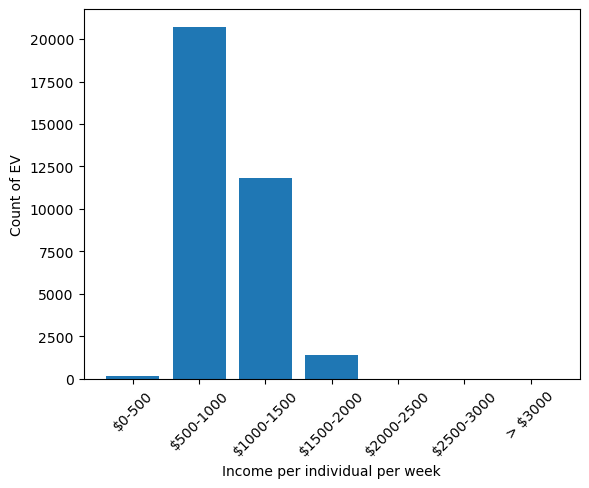

In [33]:
#create bar plot for income range against count of EV ownerships
plt.bar(income_labels, grouped_by_income, align='center')
plt.xlabel('Income per individual per week')
plt.ylabel('Count of EV')
tick_locations = [value for value in income_labels]
plt.xticks(tick_locations, income_labels, rotation=45)
plt.savefig("Output/Income vs EV Rego.png")

In [34]:
#create bins, labels and create new column for age range
age_bins = [15,25,35,45,55,65,75,85]
age_labels = ['15-25','25-35', '35-45','45-55','55-65','65-75','>75']
merged['Age Range'] = pd.cut(merged['Median_age_persons'], age_bins, labels=age_labels)

In [35]:
#filter for electric vehicles only
merged_bev = merged.loc[merged['Fuel Type'] == 'Battery Electric Vehicle']
merged_bev.head()

,Postcode,Median_age_persons,Median_tot_prsnl_inc_weekly,State,Fuel Type,Registrations as at 31 January 2021,Registrations as at 31 January 2022,Registrations as at 31 January 2023,Income Range,Age Range
1,2000,32,941,NSW,Battery Electric Vehicle,76.0,159.0,272.0,$500-1000,25-35
5,2007,30,772,NSW,Battery Electric Vehicle,5.0,14.0,24.0,$500-1000,25-35
9,2008,28,860,NSW,Battery Electric Vehicle,9.0,20.0,34.0,$500-1000,25-35
13,2009,37,1297,NSW,Battery Electric Vehicle,22.0,42.0,85.0,$1000-1500,35-45
17,2010,36,1479,NSW,Battery Electric Vehicle,37.0,80.0,155.0,$1000-1500,35-45


In [36]:
#group count of EV by age range
grouped_by_age = merged_bev.groupby(['Age Range'])['Registrations as at 31 January 2022'].sum()
grouped_by_age

Age Range
15-25       86.0
25-35     8027.0
35-45    21977.0
45-55     3520.0
55-65      456.0
65-75       10.0
>75          0.0
Name: Registrations as at 31 January 2022, dtype: float64

In [37]:
#show as df
pd.DataFrame(grouped_by_age)

,Registrations as at 31 January 2022
Age Range,
15-25,86.0
25-35,8027.0
35-45,21977.0
45-55,3520.0
55-65,456.0
65-75,10.0
>75,0.0


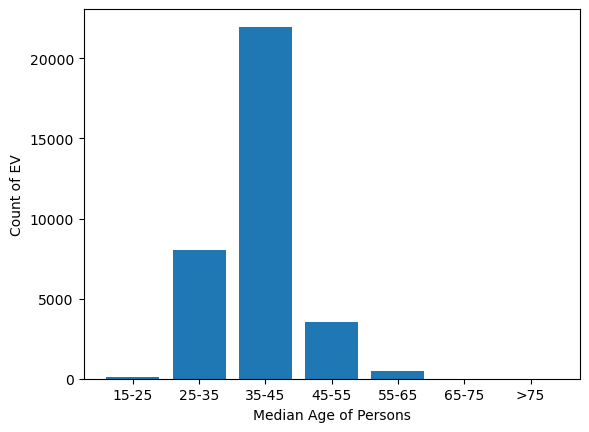

In [38]:
#plot bar graph of EV count vs median age
plt.bar(age_labels, grouped_by_age, align='center')
plt.xlabel('Median Age of Persons')
plt.ylabel('Count of EV')
plt.savefig("Output/Age vs EV Rego.png")